In [1]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import DateFormatter
import datetime
import dateutil.parser

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
experiment_data = pandas.read_json("experiments/exp7/raw_json/"+"fourmetre.json")

In [6]:
def convert_timestring(row):
    return dateutil.parser.parse(row.time)

In [7]:
experiment_data["timestamp"] = experiment_data.apply (lambda row: convert_timestring(row), axis=1)

In [15]:
after_time  = dateutil.parser.parse('2016-07-12T03:30:00.0')
before_time = after_time + datetime.timedelta(minutes=1)

print "between {} and {}".format(after_time, before_time)

between 2016-07-12 03:30:00 and 2016-07-12 03:31:00


In [17]:
filtered_data = experiment_data[(experiment_data.timestamp > after_time) & (experiment_data.timestamp < before_time)]

print filtered_data
print len(filtered_data)

            agentId  major  minor  rssi                        time  tx  \
883  RPi four metre      5      5   -71  2016-07-12T03:30:00.118728 -58   
884  RPi four metre      5      5   -65  2016-07-12T03:30:03.937096 -58   
885  RPi four metre   9752  43912   -96  2016-07-12T03:30:04.049621 -65   
886  RPi four metre      5      5   -70  2016-07-12T03:30:04.888516 -58   
887  RPi four metre      5      5   -66  2016-07-12T03:30:05.839763 -58   
888  RPi four metre      5      5   -74  2016-07-12T03:30:06.797889 -58   
889  RPi four metre      5      5   -86  2016-07-12T03:30:07.749871 -58   
890  RPi four metre      5      5   -71  2016-07-12T03:30:08.709738 -58   
891  RPi four metre   9752  43912   -85  2016-07-12T03:30:09.626890 -65   
892  RPi four metre      5      5   -82  2016-07-12T03:30:10.622611 -58   
893  RPi four metre   9752  43912   -89  2016-07-12T03:30:11.899524 -65   
894  RPi four metre      5      5   -76  2016-07-12T03:30:12.528948 -58   
895  RPi four metre      

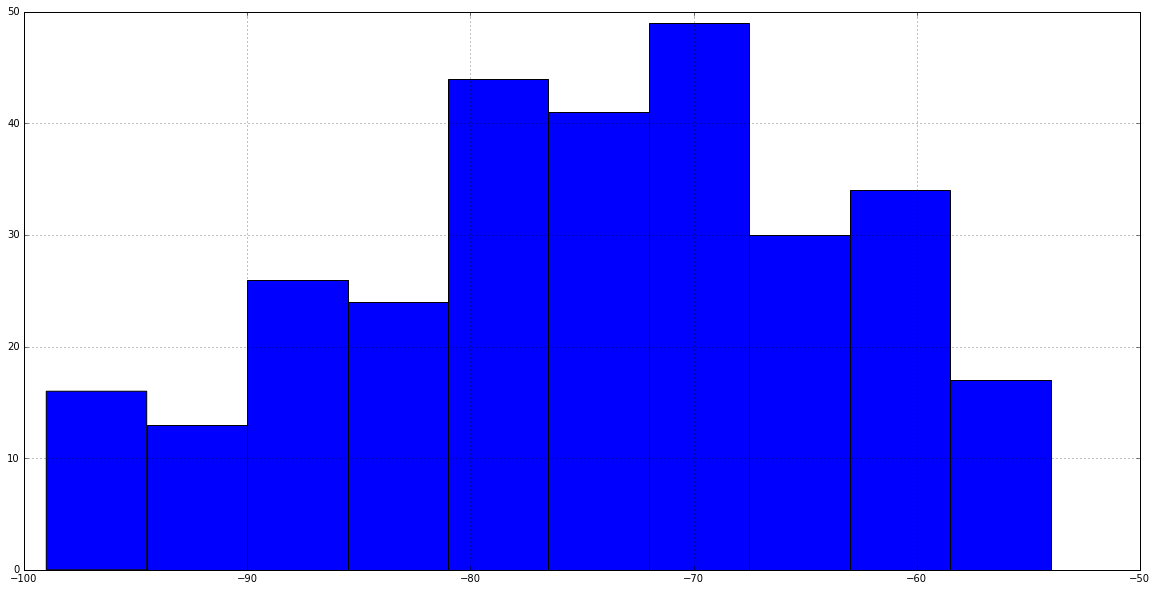

In [11]:
filtered_data.rssi.hist()